# COMP 4522-002 - Assignment 3 by Gareth Carvalho

Hello Orestes,

This is my submission for Assignment 3.

## 1. Extraction

## Extracting from MySQL

Extracting data from a MySQL database and turning it into a CSV is pretty simple. If you use a language such as Python, you can can grab your data using a query like `SELECT * FROM table_name`. This will return an object where its column names are in the `description` attribute.

From there, you can grab the column names, and append the tuples of the rows to the list, and write out each entry in the list into the csv.

```Python
conn = mysql.connect(
    # credentials
)
cursor = conn.cursor()

cursor.execute("SELECT * FROM table_name")
rows = cursor.fetchall()

columns = []
for d in rows.description:
    # grabs the column name
    columns.append(d[0])

final = [columns]
for r in rows:
    final.append(r)
cursor.close()

write_to_csv_function(final)
```

Credit to this stack overflow post: https://stackoverflow.com/questions/4613465/using-python-to-write-mysql-query-to-csv-need-to-show-field-names


## Extracting from MongoDB

This one is a more complicated, because since MongoDB documents are extremely similar to JSON files, they can be nested. SQL databases make it easy, in that both SQL and CSV files don't support arrays, but Mongo is different. First, use a programming language like Python to extract the data.

Then, the first priority would be to get rid of the nested structures. This would mean that the nested objects/arrays would have to be extracted out into their own relations with a foreign key to their host object. This is similar to the "link" process of different pieces of data. Instead of keeping all the data in one document, we would split it with a logical link to the host object. 

Once the nests have been broken down to one layer, we can then tackle the schema issue. Since some objects have fields that others don't, we have to group similar objects and make a pool of their keys. This would act as the columns at the top of the csv files.

Finally, loop through all similar objects, and write each of their values into the csv files, filling in `NULL` or whatever other appropriate missing value.

This is the simplist way I can wrap my head around accomplishing this.


## 2. Data Inspection, Exception Reporting and Cleansing

The order I went about cleaning the data was actually pretty important, as there were foreign keys in some relations that required data in other relations to exist. For example, the Employee_Information and Student_Counceling_Information both had Department ID's as foreign keys, so I had to do the Department_Information first.

Below, I have imported a function from `department.py` called `clean_department_info`, that does exactly as it describes. It changes the data that is passed in by removing any entries that have data that is problematic. It also returns the unique department IDs as a list and an object for the exceptions. The exceptions are reported below.

In [75]:
from readandprint import myreader
from department import clean_department_info

dept_info = myreader('data/Department_Information.csv')
dept_ids, exceptions = clean_department_info(dept_info)

for e in exceptions:
    print(exceptions[e])

{'index': 22, 'issues': [{'attribute': 'Department_ID', 'issue': 'Not Unique'}, {'attribute': 'DOE', 'issue': 'Missing'}], 'action': 'Removed'}
{'index': 26, 'issues': [{'attribute': 'Department_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 32, 'issues': [{'attribute': 'DOE', 'issue': 'Invalid Date: 1849'}], 'action': 'Removed'}
{'index': 36, 'issues': [{'attribute': 'Department_ID and Department_Name', 'issue': 'Duplicate Entry'}], 'action': 'Removed'}
{'index': 40, 'issues': [{'attribute': 'Department_ID', 'issue': 'Not Unique'}, {'attribute': 'DOE', 'issue': 'Missing'}], 'action': 'Removed'}
{'index': 46, 'issues': [{'attribute': 'Department_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}


The `'index'` refers to the index in the list from the `myreader` function. In the Department_Information.csv file, the `'index'` + 1 will be the line it refers to in the file. (This includes the first line with the column names as well).

Below, I am printing the cleaned data for the Department_Information. This is the only relation I will do that with, since all of the other ones are way bigger in comparison.

In [76]:
from util import csv_to_dataframe

df = csv_to_dataframe(dept_info)
df

,Department_ID,Department_Name,DOE
0,IDEPT4670,Aerospace Engineering,5/31/1961
1,IDEPT5528,Biosciences and Bioengineering,6/28/1943
2,IDEPT3115,Chemical Engineering,5/1/1940
3,IDEPT5881,Chemistry,6/8/2013
4,IDEPT4938,Civil Engineering,10/27/1941
5,IDEPT1423,Computer Science & Engineering,5/3/1941
6,IDEPT4132,Earth Sciences,8/19/1982
7,IDEPT2054,Electrical Engineering,5/27/1985
8,IDEPT2357,Energy Science and Engineering,3/28/2007
9,IDEPT1537,Humanities & Social Science,9/14/1953


Now, we can move onto Student_Counceling_Information. Below, I am importing a function from `student_counceling.py` called `clean_student_counceling_info`. Similar to the previous cleaning function, it changes the data passed in and returns the exceptions, as well as the unique student IDs to be used later. The only difference is that it also takes in a list of department IDs to check student's department choice and admission.

Also, in this cleaning process, I have stripped the student IDs of their "SID" prefix, as I will be using their numeric counterpart in the data mining phase later.

In [77]:
from student_counceling import clean_student_counceling_info

student_counceling_info = myreader('data/Student_Counceling_Information.csv')
student_ids, exceptions = clean_student_counceling_info(student_counceling_info, dept_ids)

for e in exceptions:
    print(exceptions[e])

{'index': 69, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 74, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 81, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 117, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 142, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 177, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 180, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 226, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 228, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 240, 'issues': [{'attribute': 'Student_ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'i

The vast majority of issues were Student ID duplication, and a few instances of missing department choices/admissions.

Next, we will clean the Student_Performance_Data. This one takes -- by far -- the longest to clean. I have also stripped the "SID" prefix from the student ID's here.

In [78]:
from student_performance import clean_student_performance_data

student_performance_data = myreader('data/Student_Performance_Data.csv')
exceptions = clean_student_performance_data(student_performance_data, student_ids)

for e in exceptions:
    print(exceptions[e])

{'index': 329, 'issues': [{'attribute': 'Marks', 'issue': 'Value out of range of 0-100: Value was -49'}], 'action': 'Removed'}
{'index': 415, 'issues': [{'attribute': 'Marks', 'issue': 'Value out of range of 0-100: Value was 207'}], 'action': 'Removed'}
{'index': 552, 'issues': [{'attribute': 'Marks', 'issue': 'Value out of range of 0-100: Value was -100'}], 'action': 'Removed'}
{'index': 841, 'issues': [{'attribute': 'Marks', 'issue': 'Value out of range of 0-100: Value was 140'}], 'action': 'Removed'}
{'index': 59636, 'issues': [{'attribute': 'Effort_Hours', 'issue': 'Invalid amount of hours: Value was -3'}], 'action': 'Removed'}
{'index': 172219, 'issues': [{'attribute': 'Marks', 'issue': 'Missing'}, {'attribute': 'Effort_Hours', 'issue': 'Missing'}], 'action': 'Removed'}
{'index': 181489, 'issues': [{'attribute': 'Marks', 'issue': 'Value out of range of 0-100: Value was 999'}], 'action': 'Removed'}
{'index': 209594, 'issues': [{'attribute': 'Marks', 'issue': 'Missing'}], 'action': 

Above are all the issues I managed to find with the data.

On the assignment document, it says to make sure there are no duplicate papers for the same students, but I wasn't able to find a single instance of that happening. Perhaps my code is just faulty, but I couldn't figure out what was wrong with it.

The way I went about it was by using a dictionary with the student ID's as a key, and the value being the list of papers they've done. I then checked whether each paper was in the respective student's list, and there was no issue.

Anyway, we can now clean the Employee_Information.

In [79]:
from employee import clean_employee_info

employee_info = myreader('data/Employee_Information.csv')
exceptions = clean_employee_info(employee_info, dept_ids)

for e in exceptions:
    print(exceptions[e])

{'index': 313, 'issues': [{'attribute': 'Employee ID', 'issue': 'Not Unique'}], 'action': 'Removed'}
{'index': 890, 'issues': [{'attribute': 'Employee ID', 'issue': 'Not Unique'}], 'action': 'Removed'}


And with that, all data has been inspected, reported, and cleaned (as far as I know). I will save out these as csv's so I can have pandas load them into dataframes later.

In [80]:
from readandprint import mywriter

mywriter('cleaned_data/Department_Information_CLEAN.csv', dept_info)
mywriter('cleaned_data/Student_Counceling_Information_CLEAN.csv', student_counceling_info)
mywriter('cleaned_data/Student_Performance_Data_CLEAN.csv', student_performance_data)
mywriter('cleaned_data/Employee_Information_CLEAN.csv', employee_info)



## 3. Data Mining

### 3.1 Descriptive Data

Below, I've plotted the relationship between Effort_Hours and Marks in the Student_Performance_Data relation.

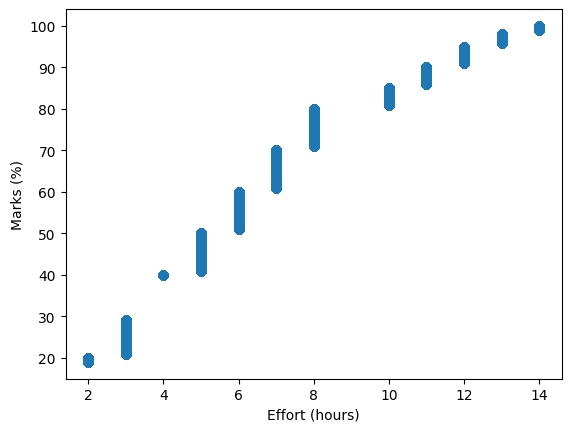

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned data into the dataframe
performance_df = pd.read_csv('cleaned_data/Student_Performance_Data_CLEAN.csv')

X = performance_df["Effort_Hours"].sort_values(ascending = True)
y = performance_df["Marks"].sort_values(ascending = True)

plt.scatter(X, y)
plt.xlabel("Effort (hours)")
plt.ylabel("Marks (%)")

plt.show()

There seems to be a pretty linear correlation here, indicating that more effort could yield better marks. Of course, this is just a correlation, and could just be a coincendence. There does, however, seem to be a range of marks at each of the different hour marks. 

This makes me think that some student's effort translates better into their marks than others.

## 3.2 Predictive Data

### 3.2.1 - Linear Regression

First, I am going to do a linear regression on Effort_Hours to try and predict Marks. This is completely separated from the students for now, but I will delve into that later.


In [82]:
from sklearn.model_selection import train_test_split
import numpy as np

X = performance_df["Effort_Hours"].sort_values(ascending = True)
y = performance_df["Marks"].sort_values(ascending = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# I have to do this before using the LinearRegression() method later
# This just turns the data into a 2D array, as opposed to 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
c = lr.intercept_
m = lr.coef_
y_predict = lr.predict(X_train)

print(f"Slope: {m} | Intercept: {c}")

Slope: [6.37443505] | Intercept: 18.052536544955224


With this, we now have our slope and y-intercept values, and can map out a linear regression with the equation: 

$y = mx + c$

This is easily handled for me by using the `lr.predict()` method.

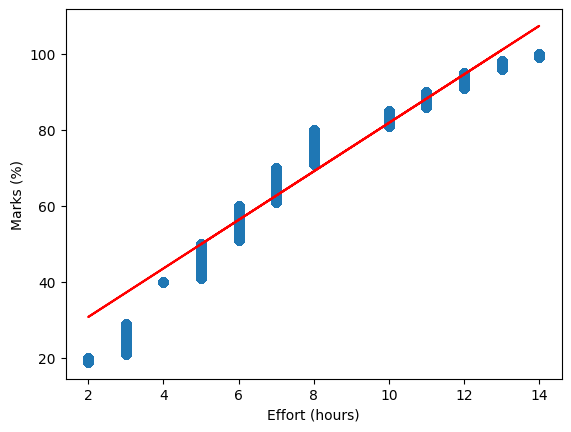

In [85]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_predict, color = 'red')
plt.xlabel("Effort (hours)")
plt.ylabel("Marks (%)")
plt.show()

That looks pretty good! We can now use this to determine roughly what mark a student will get given the amount of effort they put in.

### 3.2.2 - Multiple Linear Regression

The way I got around this was by using a Multiple Linear Regression. I know we haven't really touched on this in class, but I couldn't figure out another way to do it. And this youtube video was really helpful with it! <https://www.youtube.com/watch?v=wH_ezgftiy0&ab_channel=RegenerativeToday>

In [86]:

X = performance_df[["Student_ID", "Effort_Hours"]]
y = performance_df["Marks"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [87]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
c = lr.intercept_
m = lr.coef_

print(f"Slope: {m} | Intercept: {c}")

Slope: [6.60004474e-07 6.36753465e+00] | Intercept: 4.802671498822136


As you can see, above we have our intercept and two slope values. This is because the multiple regression equation looks like this:

$y = m_1x_1 + m_2x_2 ... + m_nx_n + c$

How ever many values you choose to use in your regression to predict Y, you will have the same amount of slopes. In this case, this regression equation will just be:

$y = m_1x_1 + m_2x_2 + c$

Below, I am plotting a prediction of marks for the students listed on the assignment document. I am also printing out the predicted marks, provided they put in 10 hours of effort.

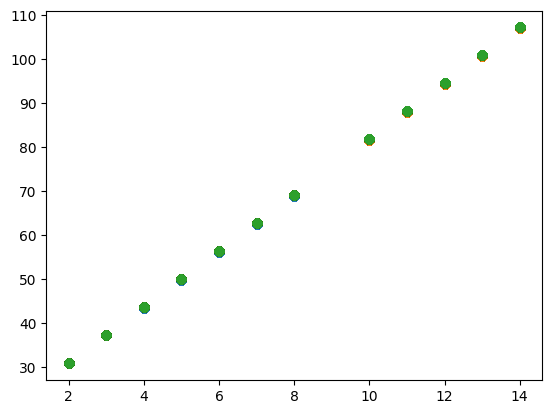

Marks for 'SID20131151' for 10 hours: 81.76466775010385
Marks for 'SID20149500' for 10 hours: 81.77677817220525
Marks for 'SID20182516' for 10 hours: 81.79856887993317


In [89]:
# These are the Student IDs that are to be tested as per the assignment doc.
sids = ['SID20131151', 'SID20149500', 'SID20182516']
marks = {}

for sid in sids:
    # stripping the 'SID' from the digits
    sidint = int(sid[3:])

    effort = X_test["Effort_Hours"]

    y_predict = (m[0] * sidint) + (m[1] * effort) + c
    plt.scatter(effort, y_predict)

    # recording the mark predicted for 10 hours of effort
    marks[sid] = (m[0] * sidint) + (m[1] * 10) + c

plt.show()
for sid in marks:
    print(f"Marks for '{sid}' for 10 hours: {marks[sid]}")

As you can see, both visually and quantitatively, the difference in marks is extremely small for these three students, with the only visual difference on the graph being if the students study anywhere from 4-14 hours. And even then, the actual visual difference on the graph is pixels.

This model should work for any student, for example:

In [90]:
sid = 'SID20131171'
sidint = int(sid[3:])

marks = (m[0] * sidint) + (m[1] * 10) + c
marks

81.76468095019335

Above, I plucked a random student ID, and plugged it into the model. Again, the number is very close to the others, but not the same.

In closing, I am a little bit confused about why there are values above 100 on my regression graph, as I definitely weeded out any values above 100. But alas, I lack the knowledge to understand why this might be the case.